# Hofstadter's Butterfly

We generate a fractal like-structure, called the Hofstadter Butterfly, which represents the energy levels of an electron travelling through a periodic lattice under the influence of a magnetic field.

The mathematical model related to the Hamiltonian of an electron in a two dimensional lattice, subject to a perpendicular (uniform) magnetic field is the Almost Mathieu (AM) operator or Harper operator, which is a discrete one-dimensional operator that acts on the Hilbert space, $\ell^{2}(\mathbb{Z})$, of the infinite sequences. It is defined by:
$$
\left(H_{\Phi, K, \theta} u\right)_{n}=u_{n+1}+u_{n-1}+K \cos (n \Phi+\theta) u_{n}, \quad \Phi, K, \theta \in \mathbb{R}
$$
When the magnetic flux penetrating the lattice corresponds to a rational number $p / q,$ i.e. $\Phi=2 \pi p / q,$ with $p, q$ relative prime integers, the spectrum of the above operator consists in $q$ bands (closed intervals) separated by gaps (J. Avron, $P$. H. $M$. v. Mouche, $B$. Simon, On the Measure of the Spectrum for the Almost Mathieu Operator, Commun Math Phys 132
(1990), 103-118).
For every irrational $\Phi,$ and parameter $K>0$, the spectrum of the AM operator is a Cantor set (A Avila, S Jitomirskaya, The Ten Martini Problem, Annals of math 170 (2009), 303-342).
For a flux $\Phi=2 \pi n p / q,$ corresponding to a rational number, the potential $V_{\theta}(n)=K \cos (2 \pi n p / q+\theta)$ is periodic and the eigenvalue problem:
$$
\left(H_{\Phi, K, \theta} u\right)_{n}=E u_{n}
$$
reduces to a matrix eigenvalue problem associated to the following periodic Jacobi matrices, called Harper matrices:
$$
\operatorname{Ha}(p, q, K, \theta, s)=\left(\begin{array}{ccccccc}
K \cos (2 \pi 0 p / q+\theta) & 1 & 0 & \ldots & 0 & 0 & s \\
1 & K \cos (2 \pi p / q+\theta) & 1 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ldots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \ldots & 1 & K \cos (2 \pi(q-2) p / q+\theta) & 1 \\
s & 0 & 0 & \ldots & 0 & 1 & K \cos (2 \pi(q-1) p / q+\theta)
\end{array}\right)
$$
with $s=\pm 1$.

More precisely, the spectrum of the operator, $\sigma\left(H_{2 \pi p} / q, K, \theta\right)$ is a union of intervals (bands) whose ends are the interlacing eigenvalues of the two Harper type matrices $H a(p, q, K, \theta, 1), H a(p, q, K, \theta,-1)$
The eigenvalues $E_{i}$, respectively $E^{\prime} i \quad, i=0,1, \ldots, q-1,$ of the two matrices can be ordered as follows:
$$
E_{2 i}<E_{2 i+1} \leq E_{2 i+2}, i \geq 0
$$
respectively:
$$
E^{\prime 2 i} \leq E^{\prime 2 i+1<E^{\prime 2 i+2}, i \geq 0}
$$
and the two series are interlaced:
$$
E_{0}<E^{\prime}_{0} \leq E^{\prime} 1<E_{1} \leq E_{2}<E^{\prime}_{2} \leq \cdots
$$
The Hofstadter butterfly was defined and studied by the physicist Douglas Hofstadter in $1976 .$ It is a graphical representation of all possible energies (eigenvalues) of the Harper matrices $H(p, q, s=1)$ corresponding to the rational values $p / q$ in [0,1).

Hence to get the Hofstadter butterfly we have to plot all points of coordinates, $\left(p / q, E_{i}\right),$ with $p / q \in[0,1), i=0,1, \ldots q-1 .$ For each $p / q, E_{i}$ runs over the q eigenvalues of the Harper matrix, $H a(p, q, s)$.

For any $q<q$ max we should compute the eigenvalues of all matrices $H a(p, q, s=1),$ with $p \in\{1,2, \ldots q-1\},$ such that $p, q$ are relative prime numbers. But since cos is an odd $2 \pi$ -periodic function, we have that
$$
\cos (2 \pi n p / q)=\cos (2 \pi n(q-p) / q)
$$
and thus
$$
H a(p, q, s)=H a(q-p, s)
$$
Hence only the spectrum of the Harper matrices $H a(p, q, s),$ with $p \in\{1,2, \ldots, q / / 2\},$ if $q$ is odd, respectively
$p \in\{1,2, \ldots, q / 2-1\},$ if $q$ is even, are calculated.

# Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# set up important functions
def gcd(a, b): # Greatest Common Divisor
    if b == 0: return a
    return gcd(b, a % b)
# if gcd == 1 then the fraction is irreducible

# set up matrix
def eigs_harper(p, q, nu = 0, mu = 0):
    # takes in p and q (and thus the ratio of p and q)
    # returns an m x m matrix with 2cos(2pi*phi*m) on the diagonal
    # 1s on the off diagonals
    # 1s in the corners (periodic boundary conditions)
    
    #define size
    size = int(q)
    # makes coses
    coses = [2*np.cos(2*np.pi*(p/q)*m - nu) for m in range(q)]
    # fill up H
    C = np.diag(coses)
    G = np.diag(np.ones(size-1), -1) + np.diag(np.ones(size-1), 1)
    G = G.astype('complex128')
    G[0,size-1] = np.exp(1j * mu * q)
    G[size-1, 0] = np.exp(-1j * mu * q)
    H = G + C
    
    #calculate eigs
    eigs = np.linalg.eigvalsh(H)
    
    # return eigs
    return list(eigs)

# main function
def main(qmax = 101, nu = 0, mu = 0):
    # main function
    phi = []
    eps = []
    for q in range(1, qmax):
        for p in range(0, q): # all p s.t p/q < 1
            if gcd(p,q) == 1:
                # add all possible phi (q copies of p/q and 1-p/q)
                phi.extend([p/q]*q + [(q-p)/q]*q)
                # compute eigs
                eigs_pq = eigs_harper(p, q, nu, mu)
                # add each eig twice for same reason as above (hermicity)
                eps.extend(eigs_pq*2)
                
    # return phis and energies
    return phi, eps

In [2]:
# get the results
Phi, E = main(mu = 0)

In [1]:
camfont = {'fontname':'Futura'}

# Funky hops or: how I learned to stop making mistakes and include $k_x$ dependence

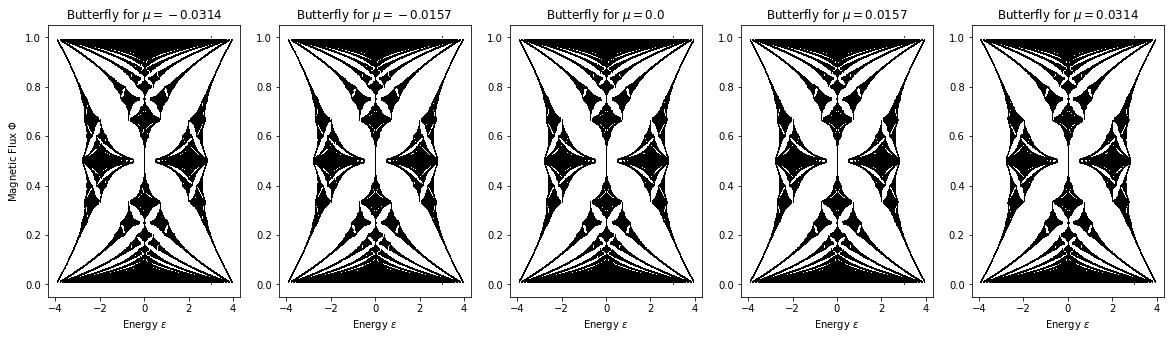

In [167]:
q_mu = 100
mus = np.linspace(-np.pi/q_mu, np.pi/q_mu, 5)

fig, axs = plt.subplots(nrows = 1, ncols = len(mus), figsize = (20,5))

# get phis and Es
for i in range(len(mus)):
    mu = mus[i]
    phis, Es = main(qmax = q_mu, mu = mu)

    # plot
    axs[i].set_title(r"Butterfly for $\mu = {:.3}$ ".format(mu))
    if i == 0:
        axs[i].set_ylabel(r"Magnetic Flux $\Phi$")
    axs[i].set_xlabel(r"Energy $\epsilon$")
    axs[i].scatter(Es, phis, c = 'k', marker = '_', s=1)
plt.savefig("phi_vs_eps_mus.png")

In [181]:
def main_mu(p = 1, q = 2, mu_b = -np.pi, mu_t = np.pi, mu_num = 100):
    # main function
    eps = []
    mu_ret = []
    mus = np.linspace(mu_b/q, mu_t/q, mu_num)
    
    # get energies
    for mu in mus:
        #gd = gcd(p,q)
        #p /= gd
        #q /= gd
        q = int(q)
        eigs_pq = eigs_harper(p,q,mu = mu)
        eps.extend(eigs_pq)
        mu_ret.extend([mu]*q)
        
    # sort nus array
    mu_ret.sort()
    
    # return nus and energies
    return mu_ret, eps

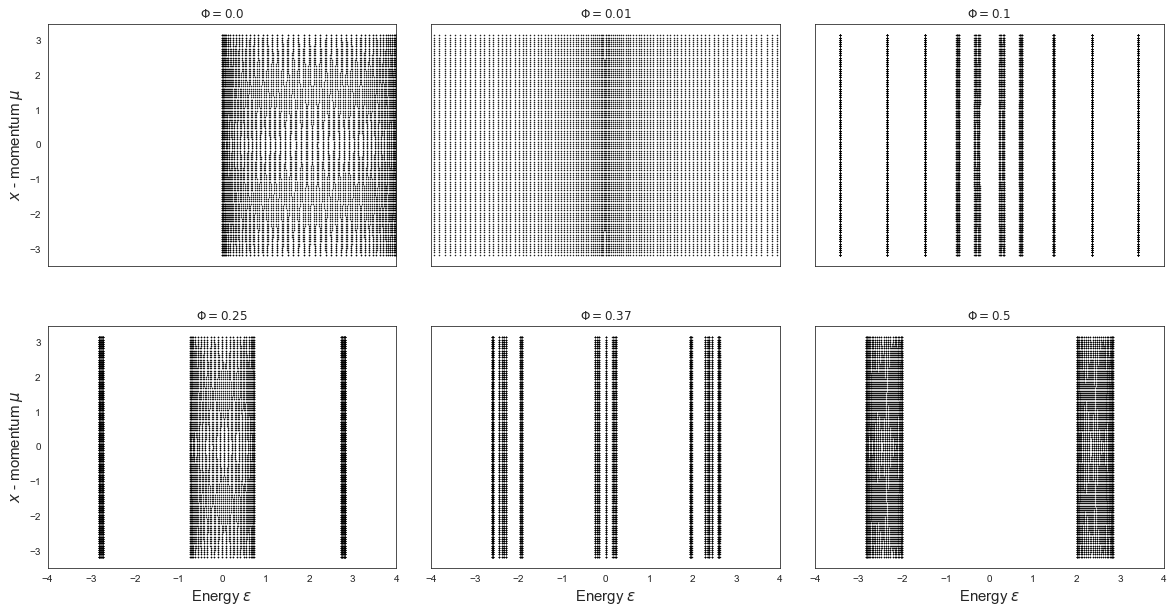

In [180]:
ps_mu = [0,1,10,25,37,50]
q_mu = 100 # same as pattern plot

fig, ax = plt.subplots(nrows = 2, ncols = int(len(ps_mu)/2), figsize = (20,10), sharey = True, sharex = True)
fig.subplots_adjust(wspace=0.1,hspace=0.25)

for i in range(len(ps_mu)):
    p_mu = ps_mu[i]
    mus, Emu = main_mu(p = p_mu, q = 100)
    
    # fix indexing
    if i < 3:
        j = 0
    elif i >= 3:
        j = 1
        i -= 3
        
    # set labels
    if i == 0:
        ax[j][i].set_ylabel(r"$x$ - momentum $\mu$", fontsize = 15)
    if j == 1: 
        ax[j][i].set_xlabel(r"Energy $\epsilon$", fontsize = 15)
        
    # plot
    ax[j][i].scatter(Emu,mus,c='k',marker='.',s=1)
    ax[j][i].set_xlim([-4,4])
    ax[j][i].set_title(r"$\Phi = {:.2}$".format(p_mu/q_mu))
    
plt.savefig("eps_vs_mus.png")
#plt.show()

# $\nu$ behaviour

### effect on pattern

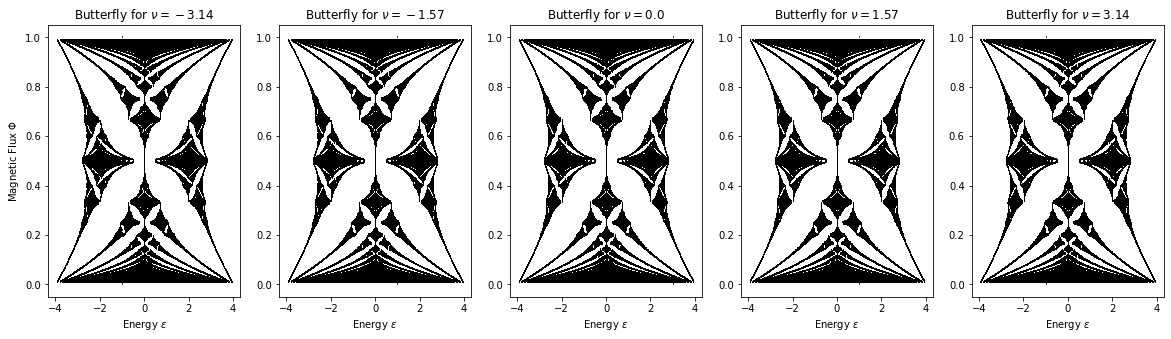

In [72]:
nus = np.linspace(-np.pi, np.pi, 5)

fig, axs = plt.subplots(nrows = 1, ncols = len(nus), figsize = (20,5))

# get phis and Es
for i in range(len(nus)):
    nu = nus[i]
    phis, Es = main(qmax = 101, nu = nu)

    # plot
    axs[i].set_title(r"Butterfly for $\nu = {:.3}$ ".format(nu))
    if i == 0:
        axs[i].set_ylabel(r"Magnetic Flux $\Phi$")
    axs[i].set_xlabel(r"Energy $\epsilon$")
    axs[i].scatter(Es, phis, c = 'k', marker = '_', s=1)
plt.savefig("phi_vs_eps_nus.png")

Look closer at the slice at $\Phi = 0$. Take $\nu = 0$ for simplicity.

In [18]:
phis0, Es0 = main(qmax = 101, nu = 0)

In [77]:
def how_many_es(phi, phis, Es):
    """
    Note: if phi does not appear in phis, then the closest value is used
    """
    min_array = np.abs(np.asarray(phis)-phi)
    min_indices = np.where(min_array == min_array.min())
    min_index = min_indices[0][0]
    num_mins = np.size(min_indices)
    #min_E = Es[min_index]
    print("Number of energy points with given Phi = {}".format(num_mins))
    #print("Energy at given Phi = {}".format(min_E))
    
how_many_es(1/101,phis0,Es0)

Number of energy points with given Phi = 200
Energy at given Phi = -3.9376603557876


### effect on energy

In [134]:
def main_nu(p = 1, q = 2, nu_b = -np.pi, nu_t = np.pi, nu_num = 100):
    # main function
    eps = []
    nu_ret = []
    nus = np.linspace(nu_b, nu_t, nu_num)
    
    # get energies
    for nu in nus:
        #gd = gcd(p,q)
        #p /= gd
        #q /= gd
        q = int(q)
        eigs_pq = eigs_harper(p,q,nu)
        eps.extend(eigs_pq)
        nu_ret.extend([nu]*q)
        
    # sort nus array
    nu_ret.sort()
    
    # return nus and energies
    return nu_ret, eps

In [ ]:
# plot a few
qmax = 101
nu_num = 100

ps = np.linspace(0, qmax, endpoint = True, num = qmax)
qs = np.full((len(ps)),qmax)

fig, axs = plt.subplots(nrows = 1, ncols = len(qs), figsize = (40,5))

# get Es
for i in range(len(ps)):
    p = ps[i]
    q = qs[i]
    nus, E_nu = main_nu(p = p, q = q, nu_num = nu_num)
    
    axs[i].set_title(r"Energy as a function of $\nu$ for $\Phi = {}$".format(p/q))
    if i == 0:
        axs[i].set_ylabel(r"$\epsilon$")
    axs[i].set_xlabel(r"$\nu$")
    axs[i].scatter(nus, E_nu, c = 'k', marker = '.', s=15)
fig.savefig("energy_vs_ky.png")

There are as many bands as `int(q)`. Thus, $\Phi = 1/2$ has 2 bands, but $\Phi = 2/5$ has 5, etc. Note: for `q = 100`, $\Phi = 50/100$ will have 100 bands.

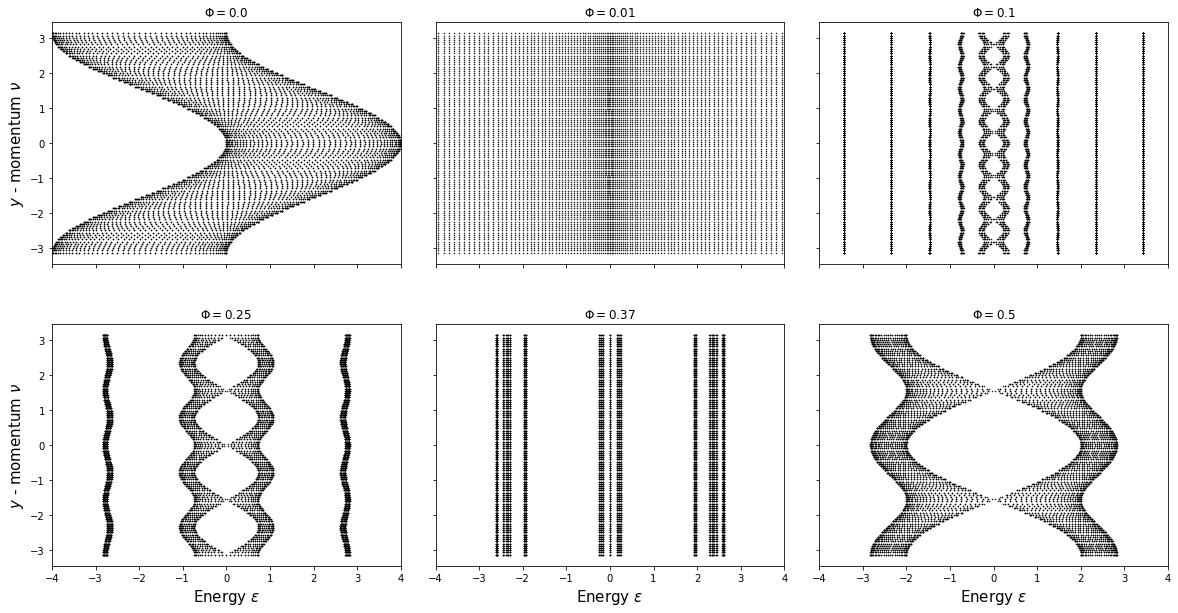

In [136]:
ps_nu = [0,1,10,25,37,50]
q_nu = 100 # same as pattern plot

fig, ax = plt.subplots(nrows = 2, ncols = int(len(ps_nu)/2), figsize = (20,10), sharey = True, sharex = True)
fig.subplots_adjust(wspace=0.1,hspace=0.25)

for i in range(len(ps_nu)):
    p_nu = ps_nu[i]
    nus, Enu = main_nu(p = p_nu, q = 100)
    
    # fix indexing
    if i < 3:
        j = 0
    elif i >= 3:
        j = 1
        i -= 3
        
    # set labels
    if i == 0:
        ax[j][i].set_ylabel(r"$y$ - momentum $\nu$", fontsize = 15)
    if j == 1: 
        ax[j][i].set_xlabel(r"Energy $\epsilon$", fontsize = 15)
        
    # plot
    ax[j][i].scatter(Enu,nus,c='k',marker='.',s=1)
    ax[j][i].set_xlim([-4,4])
    ax[j][i].set_title(r"$\Phi = {:.2}$".format(p_nu/q_nu))
    
plt.savefig("eps_vs_nus.png")
#plt.show()

### time test for sparse matrices

In [4]:
# matrix
p = 1
q = 1000
coses = [2*np.cos(2*np.pi*(p/q)*m - 0) for m in range(q)]
C = np.diag(coses)
G = np.diag(np.ones(int(q)-1), -1) + np.diag(np.ones(int(q)-1), 1)
G[0,int(q)-1] = 1
G[int(q)-1, 0] = 1
A = G + C
print(A)
 
# normal way
import time
import scipy.sparse.linalg as spars
t0 = time.time()
eigs = np.linalg.eigvalsh(A)
t1 = time.time()
print(t1-t0)

# sparse
t2 = time.time()
eigsspasrse = spars.eigsh(A, k = int(q), return_eigenvectors=False)
t3 = time.time()
print(t3-t2)

#print(eigs - eigsspasrse)

[[2.         1.         0.         ... 0.         0.         1.        ]
 [1.         1.99996052 1.         ... 0.         0.         0.        ]
 [0.         1.         1.99984209 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.9996447  1.         0.        ]
 [0.         0.         0.         ... 1.         1.99984209 1.        ]
 [1.         0.         0.         ... 0.         1.         1.99996052]]
0.11630582809448242
0.07778692245483398


`np.linalg.eigvalsh` is faster for smaller `q`, but `scipy.sparse.linalg.eigsh` is more scalable.

# $\Phi = 1/2$

In [3]:
def main_rep(qmax = 101, nu = 0, mu = 0):
    # main function
    phi = []
    eps = []
    for q in range(1, qmax):
        for p in range(0, q): # all p s.t p/q < 1
            # add all possible phi (q copies of p/q and 1-p/q)
            phi.extend([p/q]*q + [(q-p)/q]*q)
            # compute eigs
            eigs_pq = eigs_harper(p, q, nu, mu)
            # add each eig twice for same reason as above (hermicity)
            eps.extend(eigs_pq*2)
                
    # return phis and energies
    return phi, eps

In [4]:
nus = np.linspace(-np.pi,np.pi,5)
E_12 = []
Phi_12 = []
for nu in nus:
    phi, eps = main_rep(qmax=100,nu = nu, mu = 0)
    Phi_12.extend(phi)
    E_12.extend(eps)

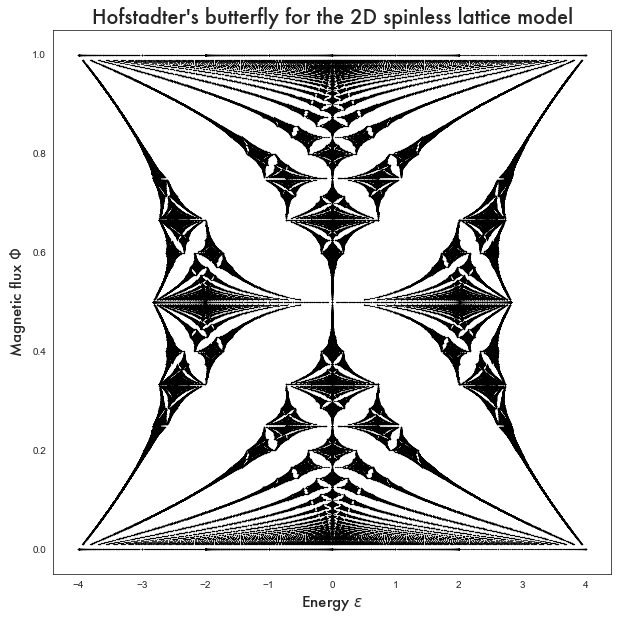

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(E_12,Phi_12, c = 'k', marker = '.', s=0.005)
plt.title("Hofstadter's butterfly for the 2D spinless lattice model", **camfont, fontsize=20)
plt.xlabel(r"Energy $\epsilon$", fontsize=15, **camfont)
plt.ylabel(r"Magnetic flux $\Phi$",fontsize=15,**camfont)
plt.show()